In [2]:
# import the imb_dp python library
import ibm_db

In [3]:
# Identify the database connection credentials that you created in the Db2 database
dsn_hostname = "dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net"
dsn_uid = "ggd09779"  # your username
dsn_pwd = "3nx-1tg8x298whvk"  # your password

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"
dsn_port = 50000
dsn_protocol = "TCPIP"



# Create the DB2 database connection

In [4]:
# DO NOT MODIFY THIS CELL. Just RUN it
# Create the dsn connection string
dsn = ("DRIVER={0};"
       "DATABASE={1};"
       "HOSTNAME={2};"
       "PORT={3};"
       "PROTOCOL={4};"
       "UID={5};"
       "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)
# print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=ggd09779;PWD=3nx-1tg8x298whvk;


Now establish the connection to the database

In [5]:
# create database connection
try:
    conn = ibm_db.connect(dsn, "", "")
    print("Connected to database: ", dsn_database, "as user:", dsn_uid, "on_host:", dsn_hostname)
    
except:
    print("Unable to connect: ", ibm_db.conn_errormsg())

Connected to database:  BLUDB as user: ggd09779 on_host: dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net


In [7]:
# Retrieve Metadata for the Database server
server = ibm_db.server_info(conn)

print('DBMS_NAME: ', server.DBMS_NAME)
print('DBMS_VER: ', server.DBMS_VER)
print('DB_NAME: ', server.DB_NAME)


DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:  11.01.0404
DB_NAME:  BLUDB


In [8]:
# Retrieve Metadata for the Database Client/Driver
client = ibm_db.client_info(conn)

print('DRIVER_NAME: ', client.DRIVER_NAME)
print('DRIVER_VER: ', client.DRIVER_VER)
print('DATA_SOURCE_NAME: ', client.DATA_SOURCE_NAME)
print('DRIVER_ODBC_VER: ', client.DRIVER_ODBC_VER)
print('ODBC_VER: ', client.ODBC_VER)
print('ODBC_SQL_CONFORMANCE: ', client.ODBC_SQL_CONFORMANCE)
print('APPL_CODEPAGE: ', client.APPL_CODEPAGE)
print('CONN_CODEPAGE: ', client.CONN_CODEPAGE)


DRIVER_NAME:  libdb2.a
DRIVER_VER:  11.01.0303
DATA_SOURCE_NAME:  BLUDB
DRIVER_ODBC_VER:  03.51
ODBC_VER:  03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:  1208
CONN_CODEPAGE:  1208


# We want to create table name INSTRUCTOR

In [26]:
# Let's fisrt drop the table name INSTRUCTOR it if exists already
dropQ = 'DROP TABLE INSTRUCTOR'
dropSt = ibm_db.exec_immediate(conn, dropQ)

In [27]:
# Let's create a table
createQ = 'CREATE TABLE INSTRUCTOR (ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(30), LNAME VARCHAR(30), CITY VARCHAR(30), CCODE CHAR(2))'
createSt = ibm_db.exec_immediate(conn, createQ)

In [28]:
# Let's insert data into the table
insertQ = "INSERT INTO INSTRUCTOR (ID,FNAME, LNAME, CITY, CCODE) VALUES(1, 'Rav', 'Ahuja', 'TORONTO','CA')"
insertQ1 = "INSERT INTO INSTRUCTOR (ID,FNAME, LNAME, CITY, CCODE) VALUES(2, 'Raul', 'Chong', 'Markham','CA')"
insertQ2 = "INSERT INTO INSTRUCTOR (ID,FNAME, LNAME, CITY, CCODE) VALUES(3, 'Hima', 'Vasudevan', 'Chicago','US')"
insertSt = ibm_db.exec_immediate(conn, insertQ)
insertSt1 = ibm_db.exec_immediate(conn, insertQ1)
insertSt2 = ibm_db.exec_immediate(conn, insertQ2)

In [30]:
selectQ = 'SELECT * FROM INSTRUCTOR'
selectSt = ibm_db.exec_immediate(conn, selectQ)
ibm_db.fetch_both(selectSt)  # This fetches first row as a dictionary

{'ID': 1,
 0: 1,
 'FNAME': 'Rav',
 1: 'Rav',
 'LNAME': 'Ahuja',
 2: 'Ahuja',
 'CITY': 'TORONTO',
 3: 'TORONTO',
 'CCODE': 'CA',
 4: 'CA'}

In [32]:
# to fetch rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectSt) !=False:
    print("ID:", ibm_db.result(selectSt,0), "FNAME:", ibm_db.result(selectSt, "FNAME"))

ID: 3 FNAME: Hima


# Using pandas makes it easier

In [33]:
import pandas as pd
import ibm_db_dbi
pconn = ibm_db_dbi.Connection(conn)


In [34]:
df = pd.read_sql(selectQ, pconn)
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,TORONTO,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


#### Accessing databases with SQL Magic
This makes easier to store data in the database and analyze it

In [4]:
# first install the ipython-sql extension
!pip install --user ipython-sql
            

     |████████████████████████████████| 40kB 5.3MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
# also install the ibm_db_sa driver
!pip install --user ibm_db
!pip install --user ibm_db_sa

In [14]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [25]:
# now we connect to a Dbs database
%sql ibm_db_sa://ggd09779:3nx-1tg8x298whvk@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB

In [18]:
%%sql  # %% is used instead of one % at the top so that the entire cell be treated as SQL

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (country VARCHAR(50),first_name VARCHAR(50),last_name VARCHAR(50),test_score INT);

INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
                        VALUES('United States', 'Marshall', 'Bernadot', 54),
                            ('Ghana', 'Celinda', 'Malkin', 51),
                            ('Ukraine', 'Guillermo', 'Furze', 53),
                             ('Greece', 'Aaron', 'Tunnow', 48);
                

 * ibm_db_sa://ggd09779:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.
4 rows affected.


[]

In [20]:
%%sql
SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES;

 * ibm_db_sa://ggd09779:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aaron,Tunnow,48


# Analyzing read world data with python and SQL

In [28]:
# load sql extension and establish a connection
# to store dataset in a table in the database
import pandas as pd
chicago_socioeconomic = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
# magic SQL PERSIST simplifies the process of table creation and writing the data from a pandas dataframe into the table
%sql PERSIST chicago_socioeconomic

 * ibm_db_sa://ggd09779:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "END-OF-STATEMENT" was found following "hicago_socioeconomic".  Expected tokens may include:  "JOIN <joined_table>".  SQLSTATE=42601 SQLCODE=-104 [SQL: 'PERSIST chicago_socioeconomic'] (Background on this error at: http://sqlalche.me/e/f405)


In [24]:
# to verify that the table creation was successful
%sql SELECT * FROM data;

 * ibm_db_sa://ggd09779:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "GGD09779.DATA" is an undefined name.  SQLSTATE=42704 SQLCODE=-204 [SQL: 'SELECT * FROM data;'] (Background on this error at: http://sqlalche.me/e/f405)


In [30]:
chicago_socioeconomic.head()

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


Problem 1. How many rows are in the dataset?

In [35]:

df = chicago_socioeconomic
len(df)

78

In [34]:
# or use sql
%sql SELECT COUNT(*) FROM chicago_socioeconomic

 * ibm_db_sa://ggd09779:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "GGD09779.CHICAGO_SOCIOECONOMIC" is an undefined name.  SQLSTATE=42704 SQLCODE=-204 [SQL: 'SELECT COUNT(*) FROM chicago_socioeconomic'] (Background on this error at: http://sqlalche.me/e/f405)


Problem 2. How many areas in Chicago have a hardship index greater than 50.0?

In [36]:
len(df[df['hardship_index'] > 50.0])
# in sql SELECT hardship_index FROM chicago_socioeconomic WHERE hardship_index > 50

38

Problem 3. What is the maximum value of hardship index in this dataset?

In [38]:
df['hardship_index'].max()
#in sql SELECT MAX(hardship_index) FROM chicago_socioeconomic

98.0

In [39]:
# to find the index of the maximum value
df['hardship_index'].idxmax()

53

Problem 4. Which community area has the highest hardship index?

In [41]:
# in sql SELECT community_area_name FROM chicago_socioeconomic WHERE hardship_index = (SELECT MAX(hardship_index)FROM chicago_socioeconomic)
df.at[df['hardship_index'].idxmax(), 'community_area_name']

'Riverdale'

Problem 5. Which Chicago community areas have per-capita incomes greater than $60,000?

In [43]:
# in sql SELECT community_area_name FROM chicago_socioeconomic WHERE per_capita_income > 60,000
df1 = df[df['per_capita_income_']>60000]
df1['community_area_name']

5           Lake View
6        Lincoln Park
7     Near North Side
31               Loop
Name: community_area_name, dtype: object

Porblem 6. Create a scatter plot using the variable per_capita_income and hardship_index.

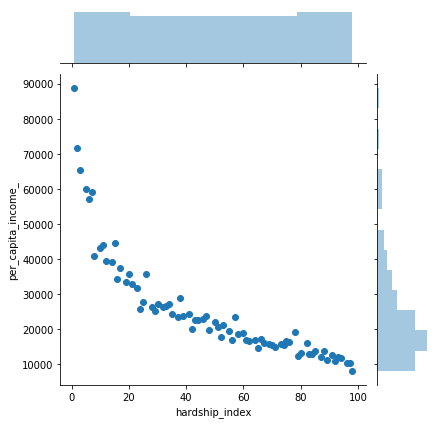

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot= sns.jointplot(x = 'hardship_index', y ='per_capita_income_', data = df)
plt.show()

Problem 7. Create a box plot for per_capita_income_

AttributeError: 'NoneType' object has no attribute 'show'

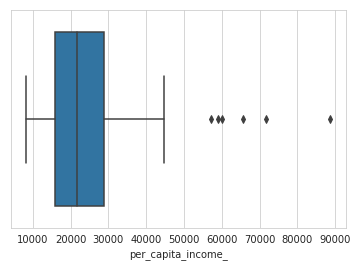

In [49]:
plot = sns.set_style('whitegrid')
ax = sns.boxplot(x=df['per_capita_income_'])
plot.show()